In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib as mpl
import scipy

import sys
import empymod

sys.path.append('../')

import emulatte as emu
from emulatte.source import VMD

<ipython-input-2-0c3fadd4f933>:85: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


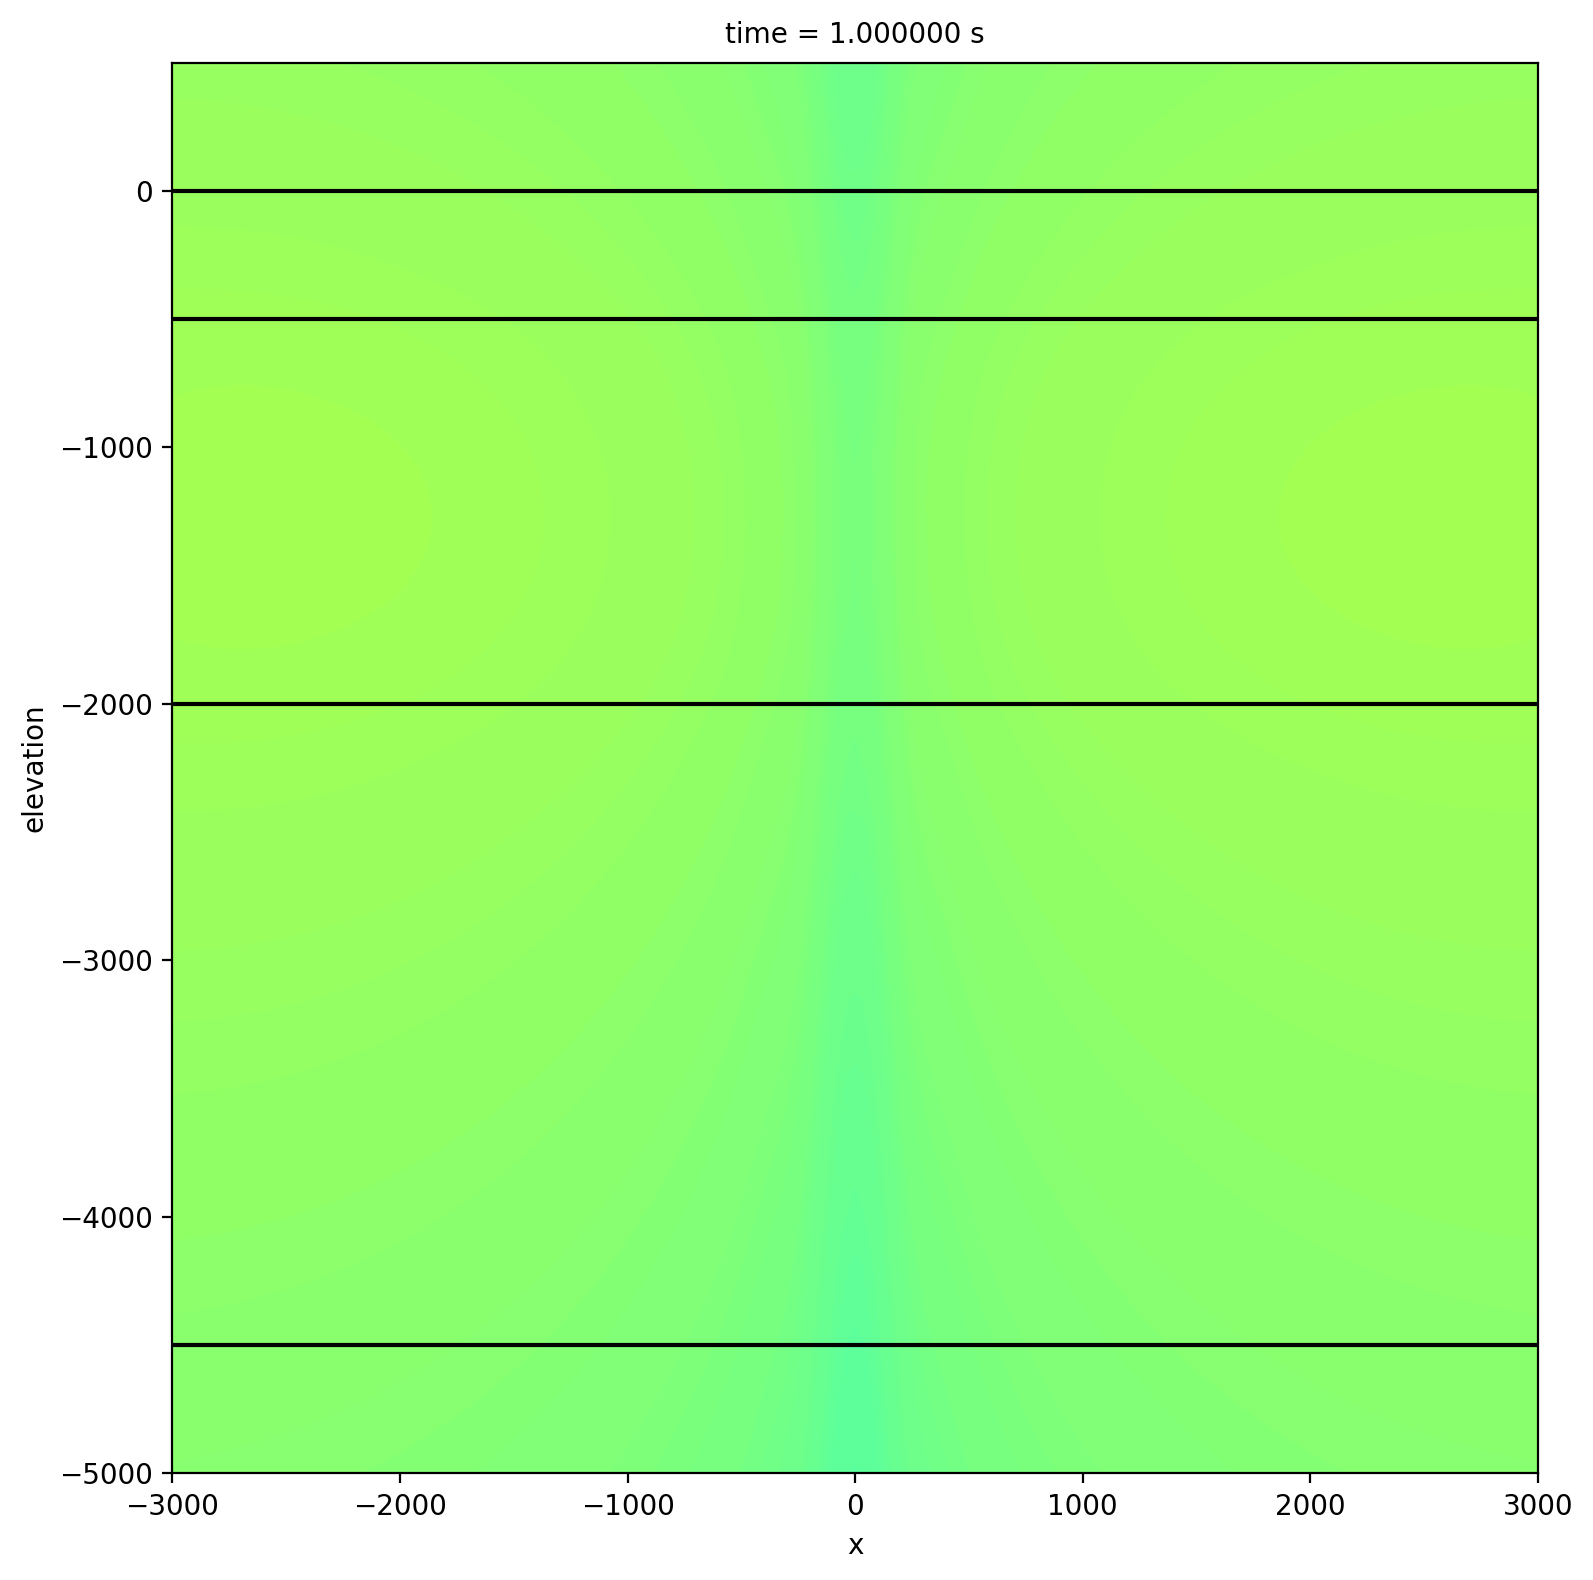

In [2]:
n = 40
frame = 25
ncontour = 30
ymax = 3000
zup = 500
zdown = 5000

xx = np.zeros(n**2)
y = np.linspace(-ymax, ymax, n)
z = np.linspace(-zup, zdown, n)
Y, Z = np.meshgrid(y, z)
yy = Y.reshape(-1)
zz = Z.reshape(-1)

def quadratic_depth_slicing(D, N, t = 1):
    n = np.arange(1, N+1)
    depth = (t*D*(n*n-1) + ((1-t)*N-t-1)*(n-1)*D) / (N-1)**2
    return depth

src = [0,0,0]
depth = quadratic_depth_slicing(zdown - zup, 4, t = 1)
thicks = np.diff(depth)
res = [280, 5, 100, 800]
model = emu.create_model(thicks)
vmd = emu.source.HCL(1, 20, ontime=-1)
model.set_params(res)
model.set_source(vmd, src)
model.set_filter(hankel_filter='key201')
P = np.zeros((frame, n*n))
times = np.logspace(-4, 0, frame)

fig = plt.figure(figsize=(8,8), dpi=200)
ax = fig.add_subplot(111)

ims = []


for j in range(len(xx)):
    rec = [xx[j], yy[j], zz[j]]
    Et = model.field("E", "xyz", rec, times)
    Ht = model.field("H", "xyz", rec, times)
    Snorm = np.zeros((n, n))
    for i in range(frame):
        S = np.cross(Et[:, i], Ht[:, i])
        Snorm = scipy.linalg.norm(S)
        P[i, j] = Snorm

P = P.reshape((frame, n, n))
P = np.log10(P)
yi = np.linspace(-ymax, ymax, 301)
zi = np.linspace(-zup, zdown,301)
YY, ZZ = np.meshgrid(yi, zi)

vmin = int(P.min()) - 1
vmax = int(P.max()) + 1
levels = np.linspace(vmin, vmax, ncontour + 1)
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
contourOpts = {"cmap": 'jet', "levels": ncontour, "norm": norm, "zorder": 2}
# contourOpts = {"cmap": 'jet',  "zorder": 2, "extend":'both'}

ax.set_xlabel('x')
ax.set_ylabel('elevation')
ax.set_ylim(-zdown, zup)
ylim = [-ymax, ymax]
ax.set_title(" ")
plt.tight_layout()

for i in range(frame):
    V = scipy.interpolate.griddata((yy, zz), P[i].reshape(-1), (YY, ZZ), method='cubic')
    cont = ax.contourf(YY, -ZZ, V, **contourOpts)
    txt = ax.text(0.5, 1.01, 'time = {:.6f} s'.format(times[i]),
                     ha='center', va='bottom',
                     transform=ax.transAxes)
    ims.append(cont.collections + [txt])

anim = animation.ArtistAnimation(fig, ims, interval=200)

for d in depth:
    ax.plot(ylim, [-d, -d], c='k', zorder = 3)

# gif 画像として保存する。
anim.save('animation2.gif', writer='pillow')

# Figure を表示する。
fig.show()

In [3]:
P.max()

-13.306704451147736

In [4]:
P.min()

-39.723354884491954

In [5]:
-41 // 10

-5

In [6]:
int(-13.90)

-13

In [7]:
thicks

array([ 500., 1500., 2500.])

In [8]:
x = np.array([[1,2,3,4,5,6,7,8,9], [1,2,3,4,5,6,7,8,9], [1,2,3,4,5,6,7,8,9]]).reshape(3,3,3)
x

array([[[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]],

       [[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]],

       [[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]]])

In [9]:
x.reshape(-1)

array([1, 2, 3, 4, 5, 6, 7, 8, 9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 1, 2, 3, 4,
       5, 6, 7, 8, 9])